In [164]:
import numpy as np
import igraph as ig
import matplotlib.pyplot as plt
plt.style.use('seaborn')

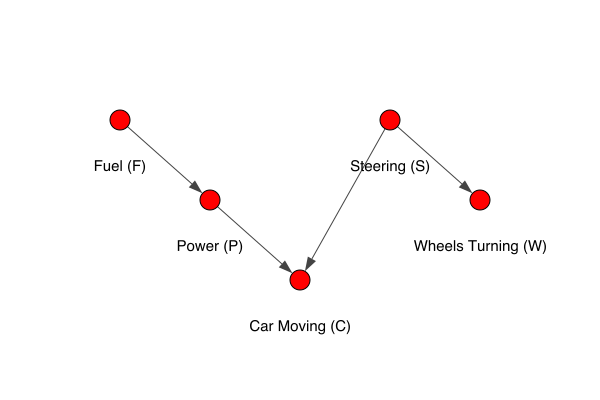

In [165]:
g = ig.Graph.Adjacency(np.array([[0, 1, 0, 0, 0], [0, 0, 1, 0, 0],[0, 0, 0, 0, 0],[0, 0, 1, 0, 1],[0, 0, 0, 0, 0]]).tolist())

g.vs['label'] = ['Fuel (F)','Power (P)','Car Moving (C)','Steering (S)','Wheels Turning (W)']
g.vs['label_size'] = 15
layout = [(0.0, 0.0), (0.5, 1.0), (1, 2.0), (1.5, 0.0), (2, 1)]
ig.plot(g, 'Images/dsep_Graph.png',layout=layout,vertex_label_dist=4,vertex_label_angle=4.712,bbox=(600, 400), margin=120)


In [122]:
layout = g.layout(layout='sugiyama')
layout.dim

2

/Users/sunaybhat/miniconda3/envs/py36_ML/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator


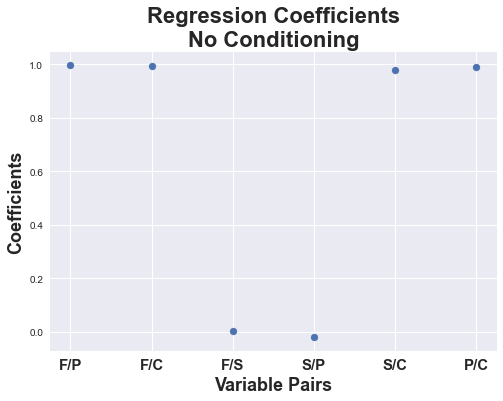

In [160]:
N = 10000

fig = plt.figure()
fig.patch.set_alpha(0)
ax = fig.add_subplot(111)

fuel = np.random.normal(0,0.1,N)
steering = np.random.normal(0,0.1,N)
power = fuel + np.random.normal(0,0.1,N)
car_moving = steering + power + np.random.normal(0,0.1,N)
wheels = steering + np.random.normal(0,0.1,N)

betas = np.zeros(6)

betas[0], b = np.polyfit(fuel, power, 1)
betas[1], b = np.polyfit(fuel, car_moving, 1)
betas[2], b = np.polyfit(fuel, steering, 1)
betas[3], b = np.polyfit(steering, power, 1)
betas[4], b = np.polyfit(steering, car_moving, 1)

betas[5], b = np.polyfit(power, car_moving, 1)

ax.scatter(range(6),betas)
ax.set_title('Regression Coefficients\nNo Conditioning',fontweight='bold',fontsize = 22)
ax.set_ylabel('Coefficients',fontweight='bold',fontsize = 18)
ax.set_xlabel('Variable Pairs',fontweight='bold',fontsize = 18)
ax.set_xticklabels(['','F/P','F/C','F/S','S/P','S/C','P/C'],fontsize=15,fontweight='bold')
ax.grid(True)
fig.savefig('Images/dsep_1.png',bbox_inches='tight')

In [103]:
power_bins = np.digitize(power,np.linspace(-0.6,0.6,25) )

betas_p = np.empty((power_bins.max(),3,))
betas_p[:] = np.nan
for i in range(power_bins.max()):
    indices = power_bins == i

    if indices.nonzero()[0].shape[0] == 0: continue

    betas_p[i,0], b = np.polyfit(fuel[indices], car_moving[indices], 1)
    betas_p[i,1], b = np.polyfit(fuel[indices], steering[indices], 1)
    betas_p[i,2], b = np.polyfit(steering[indices], car_moving[indices], 1)

car_bins = np.digitize(car_moving,np.linspace(-0.6,0.6,25) )

betas_c = np.empty((car_bins.max(),3,))
betas_c[:] = np.nan
for i in range(car_bins.max()):
    indices = car_bins == i

    if indices.nonzero()[0].shape[0] == 0: continue

    betas_c[i,0], b = np.polyfit(fuel[indices], power[indices], 1)
    betas_c[i,1], b = np.polyfit(fuel[indices], steering[indices], 1)
    betas_c[i,2], b = np.polyfit(power[indices], steering[indices], 1)


/Users/sunaybhat/miniconda3/envs/py36_ML/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


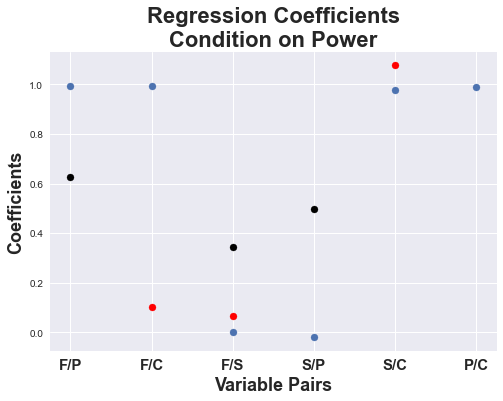

In [163]:
fig = plt.figure()
fig.patch.set_alpha(0)
ax = fig.add_subplot(111)
ax.scatter(range(6),betas)
ax.scatter([1,2,4],abs(np.nanmean(betas_p,0)),c='r')
ax.scatter([0,2,3],abs(np.nanmean(betas_c,0)),c='k')
ax.set_title('Regression Coefficients\nCondition on Power',fontweight='bold',fontsize = 22)
ax.set_ylabel('Coefficients',fontweight='bold',fontsize = 18)
ax.set_xlabel('Variable Pairs',fontweight='bold',fontsize = 18)
ax.set_xticklabels(['','F/P','F/C','F/S','S/P','S/C','P/C'],fontsize=15,fontweight='bold')
ax.grid(True)
fig.savefig('Images/dsep_3.png',bbox_inches='tight')
